# EDA for Anime Recommender System

We are going to start importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_anime=pd.read_csv('data/anime.csv')
df_rating=pd.read_csv('data/rating.csv')

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


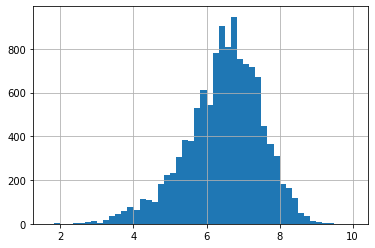

In [12]:
#df_anime.rating.plot(type='hist')
df_anime.rating.hist(bins=50)

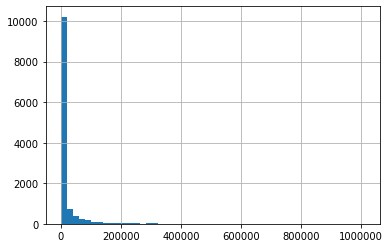

In [13]:
df_anime.members.hist(bins=50)

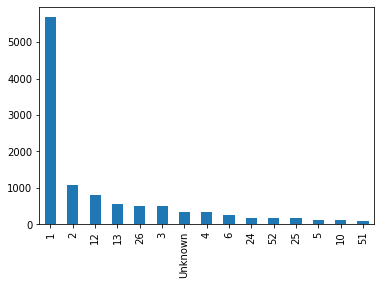

In [26]:
#df_anime.episodes.hist(bins=10)
#df_anime.episodes.plot.bar(x='episodes')
df_anime.episodes.value_counts().head(15).plot.bar()

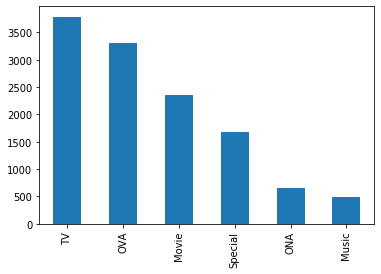

In [31]:
df_anime.type.value_counts().plot.bar()

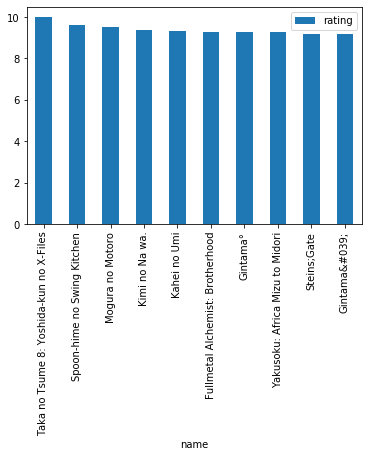

In [43]:
#Top 10 Animes Rating counts
df_anime.sort_values(by='rating', ascending=False )[['name','rating']].head(10).plot.bar(x='name')

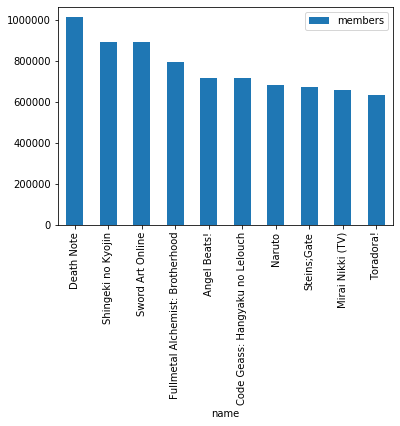

In [44]:
#Top 10 based on number of members
df_anime.sort_values(by='members', ascending=False )[['name','members']].head(10).plot.bar(x='name')

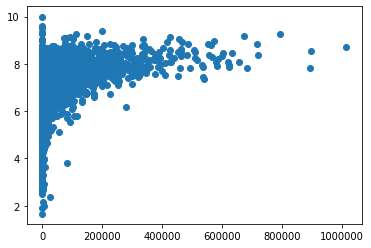

In [52]:
#Relation between number of members and rating
plt.scatter(x=df_anime.members, y=df_anime.rating)

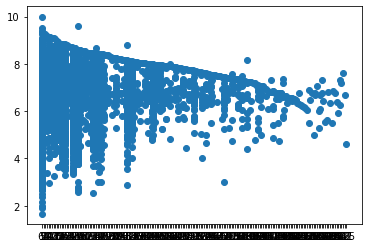

In [49]:
#Relation between number of members and rating
#Se podría mejorar esta imagen
plt.scatter(x=df_anime.episodes, y=df_anime.rating)

In [63]:
null_features = df_anime.columns[df_anime.isna().any()]
df_anime[null_features].isna().sum()

genre      62
type       25
rating    230
dtype: int64

In [56]:
from collections import defaultdict
import re
import os

all_genres = defaultdict(int)

for genres in df_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

AttributeError: 'float' object has no attribute 'split'

In [68]:
df_anime[df_anime.rating.isna()]['name'].tolist()

['Inazma Delivery',
 'Nananin no Ayakashi: Chimi Chimi Mouryou!! Gendai Monogatari',
 'Gintama (2017)',
 'One Punch Man 2',
 'Steins;Gate 0',
 'Shingeki no Kyojin Season 2',
 'Code Geass: Fukkatsu no Lelouch',
 'Boku no Hero Academia 2nd Season',
 'Kono Subarashii Sekai ni Shukufuku wo! 2',
 'Ao no Exorcist: Kyoto Fujouou-hen',
 'Super Lovers 2',
 'Saenai Heroine no Sodatekata ♭',
 'Violet Evergarden',
 'K: Seven Stories',
 'Sword Art Online Movie: Ordinal Scale',
 'Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka Gaiden: Sword Oratoria',
 'Masamune-kun no Revenge',
 'Kantai Collection: KanColle Zoku-hen',
 'Fate/Extra Last Encore',
 'Yowamushi Pedal: New Generation',
 'Kekkai Sensen &amp; Beyond',
 'Mekakucity Reload',
 'Fate/stay night Movie: Heaven&#039;s Feel',
 'Fuuka',
 'Free! (Shinsaku)',
 'No Game No Life Movie',
 'Little Witch Academia (TV)',
 'Kuzu no Honkai',
 'ChäoS;Child',
 'Eromanga-sensei',
 'Berserk (2017)',
 'Hand Shakers',
 'Zero kara Hajimeru Mahou no Sho',
 